<a href="https://colab.research.google.com/github/SaionaraAraujo/Estatistica_do_basico_ao_avancado/blob/main/Desafio_Teste_hip%C3%B3tese_(diferen%C3%A7a_de_m%C3%A9dias).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descrição do desafio

Somos uma ong de animais e queremos incentivar a adoção de pets. Para isso, vamos mostrar um vídeo de animais para as pessoas. Porém, não sabemos o que é mais efetivo: um vídeo de cachorros ou um vídeo de gatos.

Por isso, resolvemos rodar um experimento: vamos criar 2 vídeos, um de cachorro e outro de gato. Depois, vamos perguntar as pessoas a probabilidade de que ela adote um animal.

*As pessoas desse experimento só verão 1 vídeo cada

*Ao final do vídeo perguntamos a elas a probabilidade de que elas adotem um animal

*As amostras são aleatorias e sem viéses sistematicos

Objetivo: Avaliar qual animal (cachorro ou gato) deve estar em um vídeo de campanha de adoção

Experimento: 500 pessoas que não possuem animais de estimação assistem aos vídeos de campanha de adoção. Os vídeos são idênticos com exceção dos animais mostrados:

    250 pessoas aleatorizadas para o vídeo com gato
    250 pessoas aleatorizadas para o vídeo com cachorro

Resposta: "Qual a chance de adotar um pet? (0-100)" depois do vídeo

A média de probabilidade de quem ve o vídeo de gato é igual a de cachorro?

Podemos definir as hipóteses como segue:
*   **H0 = as médias são iguais**, ou seja `m1-m2 = 0`
*   **H1 = as médias não são iguais**


**A condição para aceitar a hipótese nula, é que o p-value encontrado, deve ser maior que o nível de significância definido.**

#Preprando o ambiente

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Cópia de cachorro_gato.csv")

#Análise Descritiva

Primeiras linhas do do conjunto de dados:

In [ ]:
df.head()

,Unnamed: 0,grupo,escore
0,0,1,59.853433
1,1,0,66.353529
2,2,1,56.495813
3,3,0,67.995090
4,4,1,70.434375


##Dicionário de dados

** Grupo - Pessoas que viram o vídeo com cachorro são do Grupo 0 e as que viram o vídeo com gato pertencem ao Grupo 1

**Escore - Probabilidade de adotar um pet após assistir o vídeo

##Medidas estatísitcas por Grupo

In [ ]:
df.groupby('grupo').describe()

Unnamed: 0                                                           \
           count        mean         std  min    25%    50%    75%    max   
grupo                                                                       
0          253.0  247.470356  147.772334  1.0  117.0  256.0  366.0  499.0   
1          247.0  251.578947  141.301675  0.0  131.5  240.0  377.5  497.0   

      escore                                                         \
       count       mean        std        min        25%        50%   
grupo                                                                 
0      253.0  55.531922  14.665402  16.304739  44.488055  55.802372   
1      247.0  56.744495  14.913287  14.654955  48.682432  56.924405   

                             
             75%        max  
grupo                        
0      66.249013  95.309459  
1      66.817326  93.259671

Podemos perceber que as medidas de tendência central **(média, mediana e desvio padrão)** do grupo 0, são ligeiramente maiores que a do grupo 1

##Histograma por Grupo

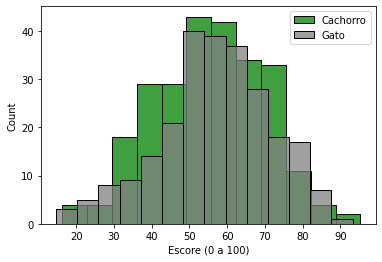

In [ ]:
sns.histplot(df[df['grupo'] == 0]['escore'], label = 'Cachorro', color = "green") #histograma grupo 0
sns.histplot(df[df['grupo'] == 1]['escore'], label = 'Gato', color="gray")  #histograma grupo 1
plt.xlabel('Escore (0 a 100)')
plt.legend()
plt.show()

O histograma nos mostra distribuições parecidas e que aparentam ser, aproximadamente, normais. Nessas condições, podemos utilizar o teste de hipótese para verificar se as médias são significamente diferentes. 

##Boxplot por grupo

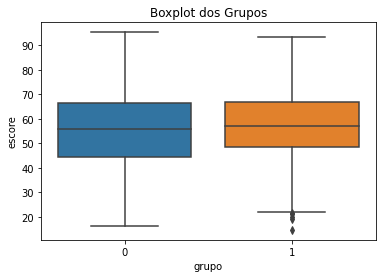

In [50]:
sns.boxplot(data = df, x= 'grupo', y='escore') #Boxplot
plt.title("Boxplot dos Grupos")
plt.show()

Com o resultado acima, podemos ver que os valores podem estar na mesma área, e por tanto, as médias podem ser iguais. Mas é preciso confirmar esta possibilidade.

Neste caso, o teste escolhido deve ser o que avalia a média para duas amostras independetes e como não há informação do desvio padrão da população, há apenas das amostras, podemos aplicar o teste t

#Comparação das duas médias com o Teste t independente

In [ ]:
#Importar a biblioteca de estatística
from scipy.stats import ttest_ind

In [ ]:
#Aplicando o teste
ttest_ind( df[df['grupo']==0]['escore'],df[df['grupo']==1]['escore'])

Ttest_indResult(statistic=-0.9166663411409343, pvalue=0.35976119585131083)

Como resultado, a função `ttest_ind`retorna uma tupla contendo o valor do teste e o p-value. Vamos organizar a tupla obtida e analisar o p-value, considerando o nível de significância de 5%.

In [ ]:
t,pvalue = ttest_ind( df[df['grupo']==0]['escore'],df[df['grupo']==1]['escore'])

In [ ]:
print('stat=%.3f, p=%.3f' % (t, pvalue))

stat=-0.917, p=0.360


Como podemos ver, o nosso `p-value`é de aproximadamente 0,36. Considerando o nível de significânica como 5%, nosso p-value deveria ser maior que 0,05. Como esta condição foi satisfeita, podemos aceitar a hipótese nula de que as médias **são iguais**.